# Simplifiying the Identification of Code Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages

## Data Preprocessing

In [2]:
def load_data_from_csv(CSV_PATH):
    return pd.read_csv(CSV_PATH,delimiter = ';',
                       names = ["module_sub_routine","id","hardware_Counter","time","event"])

In [3]:
def drop_columns(dataFrame,list_col):
    return dataFrame.drop(list_col,axis=1)

In [4]:
# Modifying the data

arr = ['module_sub_routine','id','time']
scalerPath = '../../data/WACCM_imp_sol_scaler.slope.labelled.csv'
scalarDF = load_data_from_csv(scalerPath)
scalarDF = drop_columns(scalarDF,arr)
    
vectorPath = '../../data/WACCM_imp_sol_vector.slope.labelled.csv'
vectorDF = load_data_from_csv(vectorPath)
vectorDF = drop_columns(vectorDF,arr)
    
psradPath = '../../data/mg2/PSrad.exe.codeblocks.fused.any.any.any.slope.labelled .csv'
psradDF = load_data_from_csv(psradPath)
psradDF = drop_columns(psradDF,arr)
    
wetdepaPath = '../../data/wetdepa_driver_v0.labelled.csv'
wetdepaDF = load_data_from_csv(wetdepaPath)
wetdepaDF = drop_columns(wetdepaDF,arr)
    
clubbPath = '../../data/clubb.labelled.csv'
clubbDF = load_data_from_csv(clubbPath)
clubbDF = drop_columns(clubbDF,arr)

In [5]:
clubbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82800 entries, 0 to 82799
Data columns (total 2 columns):
hardware_Counter    82800 non-null object
event               82800 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
def get_CounterNames(dataFrame):
    counter_name = dataFrame['hardware_Counter']
    return counter_name.unique()

def remove_ABS_Counter(counterNames):
    counterName = []
    for str in counterNames:
        if "_per_ins" in str:
            counterName.append(str)
        elif "LABEL" == str:
            counterName.append(str)
    return counterName

In [7]:
counter_name = get_CounterNames(vectorDF)
counterNameList = remove_ABS_Counter(counter_name) 
counterNameList.remove("PAPI_VEC_DP_per_ins")
len(counterNameList)


43

Above two list has different number of items. Out of all the lists VectorDF has less number of hardware counters. So considering only vectorDF.

In [8]:
def rearrange(dataFrame,counterNameList):
    df_per_ins = pd.DataFrame(columns = counterNameList)
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins[tempStr] = temp_df['event'].values
    df_per_ins = df_per_ins[~df_per_ins.isin([np.nan,np.inf,-np.inf]).any(1)]
    return df_per_ins

In [9]:
scalarDF = rearrange(scalarDF,counterNameList)
vectorDF = rearrange(vectorDF,counterNameList)
psradDF = rearrange(psradDF,counterNameList)
wetdepaDF = rearrange(wetdepaDF,counterNameList)
clubbDF = rearrange(clubbDF,counterNameList)    

In [10]:
def append_DataFrames(dataFrameA,dataFrameB):
    return dataFrameA.append(dataFrameB)

In [11]:
resultDF = append_DataFrames(scalarDF,vectorDF)
resultDF = append_DataFrames(resultDF, psradDF)
resultDF = append_DataFrames(resultDF,wetdepaDF)

In [12]:
resultDF

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
1,0.044295,0.058603,0.000749,0.017464,0.043467,0.026829,0.014308,0.000000,0.039988,0.000000,...,0.010735,0.082503,0.0,0.251564,0.000000,0.002026,0.000421,1.439640,0.267150,-1.0
2,0.033854,0.044791,0.000572,0.013353,0.033225,0.020500,0.010936,0.000000,0.030483,0.000000,...,0.008149,0.400129,0.0,0.192323,0.262785,0.001548,0.000322,1.100610,0.203565,-1.0
3,0.033807,0.044730,0.000571,0.013344,0.033185,0.020462,0.010923,0.000000,0.030292,0.000000,...,0.008048,0.400268,0.0,0.192153,0.513357,0.001546,0.000321,1.099620,0.202199,-1.0
4,0.033741,0.044645,0.000569,0.013332,0.033129,0.020408,0.010904,0.000000,0.030016,0.000000,...,0.007914,0.400445,0.0,0.191920,0.514072,0.001541,0.000320,1.098210,0.200261,-1.0
5,0.033658,0.044538,0.000567,0.013316,0.033061,0.020341,0.010880,0.000000,0.029668,0.000000,...,0.007755,0.400645,0.0,0.191635,0.514923,0.001535,0.000319,1.096450,0.197821,-1.0
6,0.033561,0.044414,0.000564,0.013298,0.032981,0.020263,0.010852,0.000000,0.029268,0.000000,...,0.007576,0.400855,0.0,0.191306,0.515866,0.001526,0.000317,1.094380,0.194979,-1.0
7,0.033453,0.044274,0.000561,0.013276,0.032893,0.020176,0.010821,0.000000,0.028822,0.000000,...,0.007382,0.401062,0.0,0.190940,0.516872,0.001515,0.000316,1.092020,0.191828,-1.0
8,0.033335,0.044122,0.000557,0.013252,0.032797,0.020082,0.010786,0.000000,0.028343,0.000000,...,0.007178,0.401257,0.0,0.190544,0.517907,0.001503,0.000314,1.089420,0.188439,-1.0
9,0.033211,0.043960,0.000553,0.013226,0.032695,0.019984,0.010749,0.000000,0.027845,0.000000,...,0.006967,0.401436,0.0,0.190125,0.518956,0.001489,0.000311,1.086640,0.184893,-1.0
10,0.033083,0.043795,0.000548,0.013199,0.032590,0.019883,0.010711,0.000000,0.027339,0.000000,...,0.006755,0.401614,0.0,0.189702,0.520022,0.001474,0.000309,1.083780,0.181259,-1.0


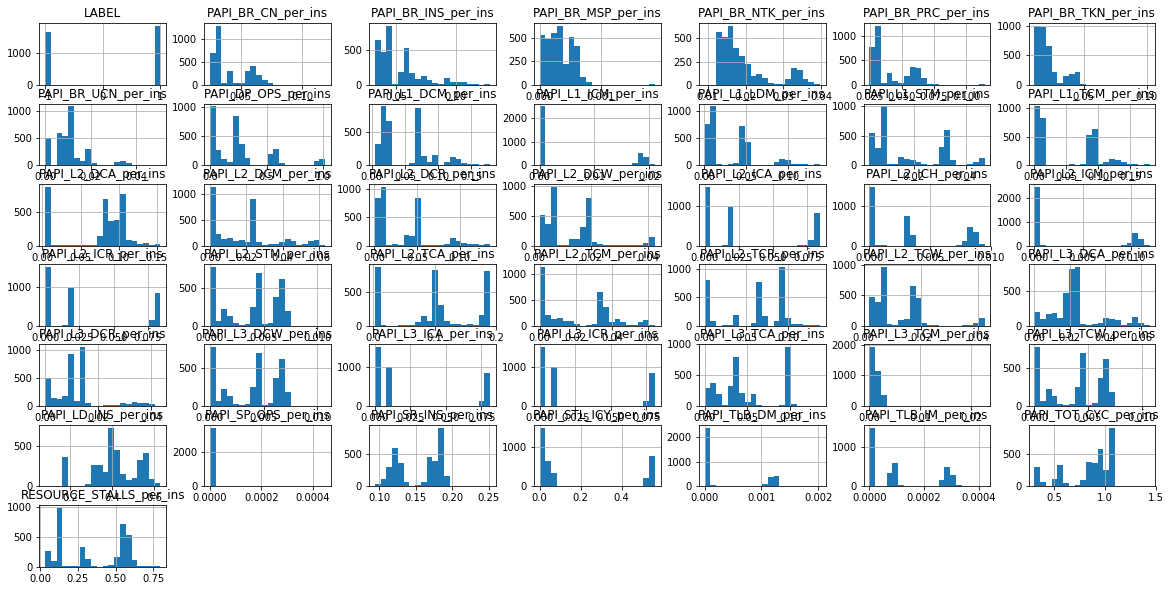

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

resultDF.hist(bins = 20,figsize=(20,10))
plt.show()

## Create Test Set

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(resultDF,test_size = 0.2, random_state=42)
print(len(train_set),"Train +",len(test_set),"test")

(2795, 'Train +', 699, 'test')


In [15]:
test_set.head()

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
949,0.028966,0.036510,0.000335,0.016255,0.028692,0.012710,0.007542,0.247923,0.070003,0.018424,...,0.006376,0.549109,0.0,0.170446,0.052079,0.000026,0.000076,0.930827,0.546198,1.0
369,0.061183,0.061195,0.000000,0.035588,0.059904,0.025597,0.000000,0.567718,0.014878,0.000000,...,0.000000,0.382106,0.0,0.131916,0.000000,0.000000,0.000000,0.569980,0.310028,1.0
654,0.057224,0.067766,0.000157,0.020206,0.057177,0.037021,0.010545,0.240337,0.130431,0.000162,...,0.001560,0.446779,0.0,0.107410,0.002884,0.000040,0.000003,0.836692,0.563632,-1.0
884,0.028393,0.035773,0.000313,0.016018,0.027957,0.012375,0.007378,0.244307,0.069302,0.018313,...,0.006289,0.516829,0.0,0.171630,0.052827,0.000034,0.000078,0.916432,0.539805,1.0
773,0.053858,0.101274,0.000308,0.014396,0.050709,0.039437,0.047438,0.401446,0.068913,0.000163,...,0.006475,0.315747,0.0,0.121373,0.004819,0.000786,0.000004,0.914490,0.587025,-1.0


In [16]:
corr_matrix = resultDF.corr()

In [17]:
corr_matrix["LABEL"].sort_values(ascending = False)

LABEL                      1.000000
PAPI_L1_ICM_per_ins        0.601138
PAPI_L2_ICM_per_ins        0.599744
PAPI_L2_ICH_per_ins        0.376299
PAPI_BR_NTK_per_ins        0.359937
RESOURCE_STALLS_per_ins    0.247597
PAPI_DP_OPS_per_ins        0.225038
PAPI_L1_STM_per_ins        0.154447
PAPI_LD_INS_per_ins        0.133888
PAPI_L2_TCM_per_ins        0.126695
PAPI_L1_TCM_per_ins        0.118934
PAPI_L3_TCM_per_ins        0.008795
PAPI_L2_DCM_per_ins       -0.025559
PAPI_L3_DCW_per_ins       -0.090546
PAPI_L2_STM_per_ins       -0.090546
PAPI_L3_TCW_per_ins       -0.090546
PAPI_SP_OPS_per_ins       -0.107840
PAPI_L2_DCW_per_ins       -0.119651
PAPI_L2_DCR_per_ins       -0.128108
PAPI_L2_TCW_per_ins       -0.143697
PAPI_L1_LDM_per_ins       -0.148066
PAPI_L1_DCM_per_ins       -0.151942
PAPI_SR_INS_per_ins       -0.166720
PAPI_BR_PRC_per_ins       -0.182877
PAPI_BR_CN_per_ins        -0.192655
PAPI_BR_INS_per_ins       -0.344690
PAPI_L3_DCR_per_ins       -0.349311
PAPI_BR_UCN_per_ins       -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15c28c10>,
      dtype=object)

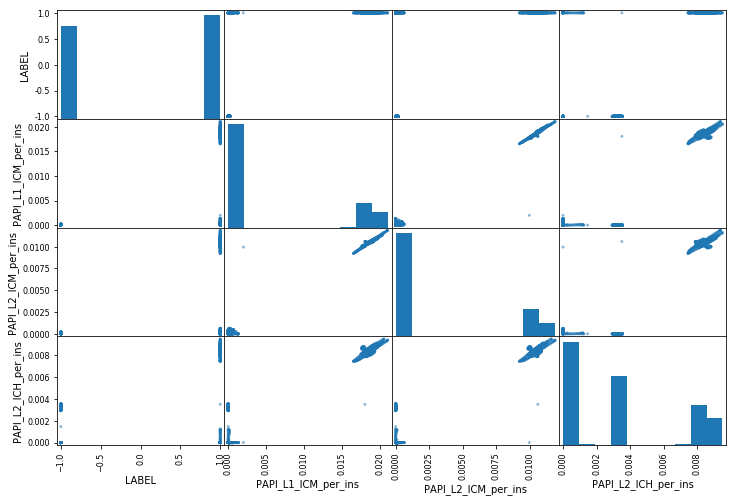

In [18]:
attributes = ["LABEL","PAPI_L1_ICM_per_ins","PAPI_L2_ICM_per_ins","PAPI_L2_ICH_per_ins"]

from pandas.plotting import scatter_matrix

scatter_matrix(resultDF[attributes], figsize=(12,8)) ## scatter matrix plots every numerical attributes against each other numerical attribute

## Prepare Data for ML

In [19]:
train_Features = train_set.drop("LABEL",axis=1)
train_Labels = train_set["LABEL"].copy()

## Feature Scaling

In [20]:
# Making all the features in same scale. Creating a pipeline to handle this. But most of our data is in same scale I am not using it. 
# it is for future purpose only

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [21]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        
    ])

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

train_Features_prepared = full_pipeline.fit_transform(train_Features)

forest_reg.fit(train_Features_prepared,train_Labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import mean_squared_error

label_predictions = forest_reg.predict(train_Features_prepared)
forest_mse = mean_squared_error(train_Labels, label_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.030965385487508178

In [24]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [25]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_Features_prepared, train_Labels,
                                scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

('Scores :', array([0.05209881, 0.02070197, 0.13732131, 0.08451543, 0.10889051,
       0.09653495, 0.0338667 , 0.03971223, 0.02932942, 0.        ]))
('Mean :', 0.06029713197255514)
('Standard Deviation :', 0.04188768860332866)


In [50]:
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": [3, None],
              "max_features": [2,4,6,8],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "n_estimators" : [1,3,10,20,50,100]
              }
forest_reg = RandomForestRegressor()


grid_search = GridSearchCV(forest_reg,param_grid,cv =10, scoring = 'neg_mean_squared_error')

grid_search.fit(train_Features_prepared,train_Labels)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [29]:
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

(0.24952338441250185, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 1, 'min_samples_split': 2, 'max_features': 2, 'max_depth': 3})
(0.18914638951151533, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 3, 'min_samples_split': 2, 'max_features': 2, 'max_depth': 3})
(0.17417945569268056, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'max_features': 2, 'max_depth': 3})
(0.16953003123697374, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 20, 'min_samples_split': 2, 'max_features': 2, 'max_depth': 3})
(0.21199729556637092, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 1, 'min_samples_split': 3, 'max_features': 2, 'max_depth': 3})
(0.18205726242513903, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 3, 'min_samples_split': 3, 'max_features': 2, 'max_depth': 3})
(0.17525985597518015, {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 3, 'max_features': 2, 'max_d

In [30]:
pd.DataFrame(grid_search.cv_results_)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005284,0.000575,-0.062262,-6.664188e-02,True,3,2,1,2,1,...,-0.069366,-0.094831,-0.042574,-0.098569,-0.028318,-0.028273,0.001277,0.000124,0.054920,6.376184e-02
1,0.012103,0.000667,-0.035776,-3.439048e-02,True,3,2,1,2,3,...,-0.019496,-0.026836,-0.017933,-0.028003,-0.048626,-0.057904,0.000719,0.000051,0.017021,1.325809e-02
2,0.037607,0.001107,-0.030338,-2.866525e-02,True,3,2,1,2,10,...,-0.019802,-0.030865,-0.027744,-0.029824,-0.019589,-0.027261,0.001617,0.000170,0.011980,5.612090e-03
3,0.072389,0.001677,-0.028740,-2.683420e-02,True,3,2,1,2,20,...,-0.023806,-0.034002,-0.027866,-0.030481,-0.022297,-0.032097,0.002604,0.000364,0.007448,4.423130e-03
4,0.005399,0.000536,-0.044943,-4.170522e-02,True,3,2,1,3,1,...,-0.028406,-0.040687,-0.041301,-0.024701,-0.071306,-0.086893,0.000589,0.000042,0.018595,1.903363e-02
5,0.012575,0.000718,-0.033145,-2.943665e-02,True,3,2,1,3,3,...,-0.003662,-0.024679,-0.032764,-0.022314,-0.009264,-0.016553,0.000450,0.000074,0.024162,1.443333e-02
6,0.037175,0.001123,-0.030716,-2.770891e-02,True,3,2,1,3,10,...,-0.022726,-0.024209,-0.023322,-0.025243,-0.017763,-0.027115,0.002795,0.000173,0.011530,7.836573e-03
7,0.071332,0.001632,-0.027887,-2.548514e-02,True,3,2,1,3,20,...,-0.020822,-0.030063,-0.017848,-0.018152,-0.022988,-0.032916,0.003110,0.000150,0.010258,4.385074e-03
8,0.005320,0.000573,-0.077466,-6.989214e-02,True,3,2,1,10,1,...,-0.053220,-0.033861,-0.309741,-0.231004,-0.028467,-0.027689,0.000397,0.000122,0.092077,7.570650e-02
9,0.012345,0.000766,-0.037543,-3.792176e-02,True,3,2,1,10,3,...,-0.024698,-0.044113,-0.025278,-0.036300,-0.007719,-0.018708,0.000641,0.000120,0.015953,1.134103e-02


In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.34797582e-03, 1.19844832e-01, 0.00000000e+00, 3.60944777e-03,
       1.89763019e-03, 3.71821934e-03, 1.78517503e-03, 9.95895167e-06,
       4.77545562e-04, 7.85587663e-04, 0.00000000e+00, 2.02765335e-03,
       7.85409155e-03, 2.29888821e-01, 9.10703867e-04, 1.99121456e-01,
       1.10878875e-04, 6.47050322e-04, 1.84483774e-03, 2.38450082e-03,
       0.00000000e+00, 9.22918468e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.63620715e-04, 1.08010439e-01, 0.00000000e+00,
       3.23967170e-05, 4.30078417e-03, 0.00000000e+00, 2.95136504e-01,
       0.00000000e+00, 0.00000000e+00, 4.23094750e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.45546489e-04,
       0.00000000e+00, 3.59047617e-03])

In [32]:
sorted(zip(feature_importances, counterNameList),reverse =True) # Importance Score

[(0.2951365044858292, 'PAPI_L3_TCA_per_ins'),
 (0.22988882078377926, 'PAPI_L2_DCA_per_ins'),
 (0.1991214562467075, 'PAPI_L2_DCR_per_ins'),
 (0.11984483192331624, 'PAPI_BR_INS_per_ins'),
 (0.10801043948173843, 'PAPI_L3_DCA_per_ins'),
 (0.007854091550356898, 'PAPI_L1_TCM_per_ins'),
 (0.005347975823388507, 'PAPI_BR_CN_per_ins'),
 (0.004300784170380489, 'PAPI_L3_ICA_per_ins'),
 (0.004230947496941701, 'PAPI_LD_INS_per_ins'),
 (0.0037182193410159933, 'PAPI_BR_TKN_per_ins'),
 (0.003609447768879503, 'PAPI_BR_NTK_per_ins'),
 (0.0035904761670751857, 'RESOURCE_STALLS_per_ins'),
 (0.002384500820652715, 'PAPI_L2_ICM_per_ins'),
 (0.0020276533467252764, 'PAPI_L1_STM_per_ins'),
 (0.0018976301936223534, 'PAPI_BR_PRC_per_ins'),
 (0.0018448377419385256, 'PAPI_L2_ICH_per_ins'),
 (0.0017851750274841176, 'PAPI_BR_UCN_per_ins'),
 (0.0009229184675020975, 'PAPI_L2_STM_per_ins'),
 (0.0009107038674505554, 'PAPI_L2_DCM_per_ins'),
 (0.0008455464885613087, 'PAPI_TLB_IM_per_ins'),
 (0.0007855876634376907, 'PAPI_L1_I

In [33]:
final_model = grid_search.best_estimator_

test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

X_test_prepared = full_pipeline.transform(test_Features)

final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(test_Labels, final_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

0.04367478547202789

In [34]:
clubb_Features = clubbDF.drop("LABEL",axis=1)
clubb_Labels = clubbDF["LABEL"].copy()

clubb_prepared = full_pipeline.transform(clubb_Features)

clubb_prediction = final_model.predict(clubb_prepared)


final_mse = mean_squared_error(clubb_Labels, clubb_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

1.068285808153059

In [35]:
q1_Actual = 0
q1_predict = 0
q2_predict = 0
q3_Actual = 0
q3_predict = 0
q4_predict = 0

correctPred = []
correctLabel = []
badPred = []
badLabel = []
        
timslots = []
tempVal = []
for i in range(len(clubb_prediction)):
    threshold = abs(clubb_Labels[i] * (float(80)/float(100)))
    if clubb_Labels[i] < 0 :
        q3_Actual = q3_Actual +1
        if clubb_prediction[i] > 0:
            q2_predict = q2_predict +1
            badPred.append(clubb_prediction[i])
            badLabel.append(clubb_Labels[i])
        else:
            q3_predict = q3_predict + 1
            correctPred.append(clubb_prediction[i])
            correctLabel.append(clubb_Labels[i])
            if abs(clubb_prediction[i] - clubb_Labels[i]) < threshold:
                timslots.append(i)
                tempVal.append(clubb_prediction[i])
    else :
        q1_Actual = q1_Actual +1
        if clubb_prediction[i] > 0:
            q1_predict = q1_predict +1
            correctPred.append(clubb_prediction[i])
            correctLabel.append(clubb_Labels[i])
        else: 
            q4_predict = q4_predict + 1
            badPred.append(clubb_prediction[i])
            badLabel.append(clubb_Labels[i])
        
correctPrediction = q3_predict + q1_predict
wrongPrediction = q2_predict + q4_predict
total = q3_Actual + q1_Actual

print timslots        
print q3_predict
print q1_predict
print q2_predict
        
goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

clubb_Labels

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 136, 137, 138, 139, 140, 141, 168, 169, 170, 171, 172, 173, 174, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
5     -1.0
6     -1.0
7     -1.0
8     -1.0
9     -1.0
10    -1.0
11    -1.0
12    -1.0
13    -1.0
14    -1.0
15    -1.0
16    -1.0
17    -1.0
18    -1.0
19    -1.0
20    -1.0
21    -1.0
22    -1.0
23    -1.0
24    -1.0
25    -1.0
26    -1.0
27    -1.0
28    -1.0
29    -1.0
      ... 
870   -1.0
871   -1.0
872   -1.0
873   -1.0
874   -1.0
875   -1.0
876   -1.0
877   -1.0
878   -1.0
879   -1.0
880   -1.0
881   -1.0
882   -1.0
883   -1.0
884   -1.0
885   -1.0
886   -1.0
887   -1.0
888   -1.0
889   -1.0
890   -1.0
891   -1.0
892   -1.0
893   -1.0
894   -1.0
895   -1.0
896   -1.0
897   -1.0
898   -1.0
899   -1.0
Name: LABEL, Length: 900, dtype: float64

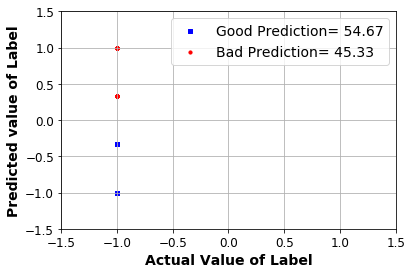

In [36]:
fig, ax = plt.subplots()
        
ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
ax.legend(loc = 'upper right', prop={'size': 14})
ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
    
ax.set_xlabel('Actual Value of Label')
ax.set_ylabel('Predicted value of Label')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid(True)
        
plt.show()

### Randomized Search CV

In [39]:
from scipy.stats import randint as sp_randint

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators" : [1,3,10,20,40,60]
              }

In [40]:
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 20
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(train_Features,train_Labels)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a15a60d90>, 'n_estimators': [1, 3, 10, 20, 40, 60], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a117c2050>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a15a602d0>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='wa

In [45]:
final_model_random = random_search.best_estimator_

test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

test_Features_transformed = full_pipeline.transform(test_Features)
final_prediction_random = final_model_random.predict(test_Features_transformed)

final_mse_random = mean_squared_error(test_Labels, final_prediction_random)
final_rmse_random = np.sqrt(final_mse_random)

In [46]:
clubb_prepared = full_pipeline.transform(clubb_Features)

clubb_prediction_random = final_model_random.predict(clubb_prepared)

final_mse = mean_squared_error(clubb_Labels, clubb_prediction_random)
final_rmse = np.sqrt(final_mse)

In [47]:
final_rmse

0.5054794089479515

In [48]:
q1_Actual = 0
q1_predict = 0
q2_predict = 0
q3_Actual = 0
q3_predict = 0
q4_predict = 0

correctPred = []
correctLabel = []
badPred = []
badLabel = []
        
timslots = []
tempVal = []
for i in range(len(clubb_prediction_random)):
    threshold = abs(clubb_Labels[i] * (float(80)/float(100)))
    if clubb_Labels[i] < 0 :
        q3_Actual = q3_Actual +1
        if clubb_prediction_grid[i] > 0:
            q2_predict = q2_predict +1
            badPred.append(clubb_prediction_random[i])
            badLabel.append(clubb_Labels[i])
        else:
            q3_predict = q3_predict + 1
            correctPred.append(clubb_prediction_random[i])
            correctLabel.append(clubb_Labels[i])
            if abs(clubb_prediction_random[i] - clubb_Labels[i]) < threshold:
                timslots.append(i)
                tempVal.append(clubb_prediction_random[i])
    else :
        q1_Actual = q1_Actual +1
        if clubb_prediction_random[i] > 0:
            q1_predict = q1_predict +1
            correctPred.append(clubb_prediction_random[i])
            correctLabel.append(clubb_Labels[i])
        else: 
            q4_predict = q4_predict + 1
            badPred.append(clubb_prediction_random[i])
            badLabel.append(clubb_Labels[i])
        
correctPrediction = q3_predict + q1_predict
wrongPrediction = q2_predict + q4_predict
total = q3_Actual + q1_Actual

print timslots        
print q3_predict
print q1_predict
print q2_predict
        
goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

clubb_Labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
5     -1.0
6     -1.0
7     -1.0
8     -1.0
9     -1.0
10    -1.0
11    -1.0
12    -1.0
13    -1.0
14    -1.0
15    -1.0
16    -1.0
17    -1.0
18    -1.0
19    -1.0
20    -1.0
21    -1.0
22    -1.0
23    -1.0
24    -1.0
25    -1.0
26    -1.0
27    -1.0
28    -1.0
29    -1.0
      ... 
870   -1.0
871   -1.0
872   -1.0
873   -1.0
874   -1.0
875   -1.0
876   -1.0
877   -1.0
878   -1.0
879   -1.0
880   -1.0
881   -1.0
882   -1.0
883   -1.0
884   -1.0
885   -1.0
886   -1.0
887   -1.0
888   -1.0
889   -1.0
890   -1.0
891   -1.0
892   -1.0
893   -1.0
894   -1.0
895   -1.0
896   -1.0
897   -1.0
898   -1.0
899   -1.0
Name: LABEL, Length: 900, dtype: float64

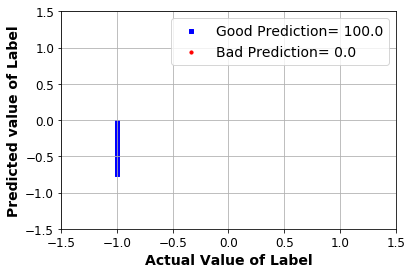

In [49]:
fig, ax = plt.subplots()
        
ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
ax.legend(loc = 'upper right', prop={'size': 14})
ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
    
ax.set_xlabel('Actual Value of Label')
ax.set_ylabel('Predicted value of Label')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid(True)
        
plt.show()